In [1]:
import pandas as pd
import dslabs_functions as dslabs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import subplots, show
from matplotlib.pyplot import savefig, figure

## tratar da primeira coluna nos notebooks anteriores
winning_alternative_scaling = 2
folder = "balancing_csvs"
#filename = f'data_preparation_csvs/feat_eng_csvs/feature_eng_alt2_data.csv'
#data_scaling: pd.DataFrame = pd.read_csv(filename, sep=',', decimal='.', na_values='')
#print(f"Dataset nr records={data_scaling.shape[0]}", f"nr variables={data_scaling.shape[1]}")
filename_prefix = "data_preparation_csvs/balancing_csvs/data_balancing_"

train = pd.read_csv('data_preparation_csvs/feat_eng_csvs/train_data_feat_select_alt3_RFE.csv')
test = pd.read_csv('data_preparation_csvs/feat_eng_csvs/test_data_feat_select_alt3_RFE.csv')

In [2]:
# Save to file
def save(df, name, file_tag):
    df.to_csv(f'{filename_prefix}{name}.csv', index=False)

    ## Separate into Train and Test and save in different files
    train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

    ## Save the training and testing sets to CSV files
    train_data.to_csv(f'data_preparation_csvs/{folder}/train_data_balancing_{name}.csv', index=False)
    test_data.to_csv(f'data_preparation_csvs/{folder}/test_data_balancing_{name}.csv', index=False)

    ## Evaluate Approach
    target = "Credit_Score"

    figure()
    eval: dict[str, list] = dslabs.evaluate_approach(train_data, test_data, target=target, metric="recall")
    dslabs.plot_multibar_chart(
        ["NB", "KNN"], eval, title=f"Credit_Score {file_tag}", percentage=True
    )
    savefig(f"data_preparation_images/balancing_result/data_balancing_{name}.png")
    show()

Minority class= 0.0 : 23124
Majority class= 1.0 : 56876
Proportion: 0.41 : 1


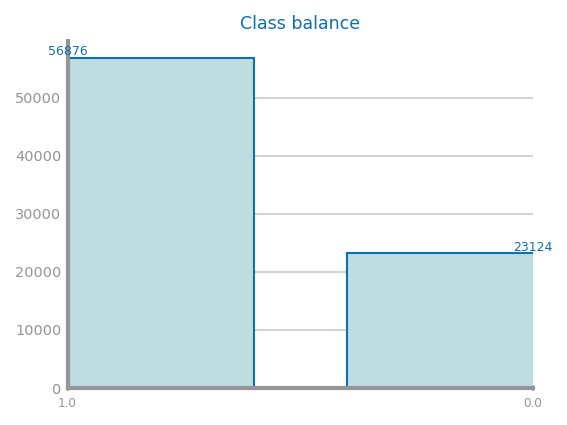

In [3]:
from pandas import read_csv, concat, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_bar_chart

target = "Credit_Score"
target_count: Series = train[target].value_counts()
positive_class = target_count.idxmin()
negative_class = target_count.idxmax()

print("Minority class=", positive_class, ":", target_count[positive_class])
print("Majority class=", negative_class, ":", target_count[negative_class])
print(
    "Proportion:",
    round(target_count[positive_class] / target_count[negative_class], 2),
    ": 1",
)
values: dict[str, list] = {
    "Original": [target_count[positive_class], target_count[negative_class]]
}

figure()
plot_bar_chart(
    target_count.index.to_list(), target_count.to_list(), title="Class balance"
)
savefig(f"data_preparation_images/balancing_result/fig_class_balance.png", bbox_inches='tight')
show()

df_positives: Series = train[train[target] == positive_class]
df_negatives: Series = train[train[target] == negative_class]

Minority class= 0.0 : 23124
Majority class= 1.0 : 23124
Proportion: 1.0 : 1


  File "c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


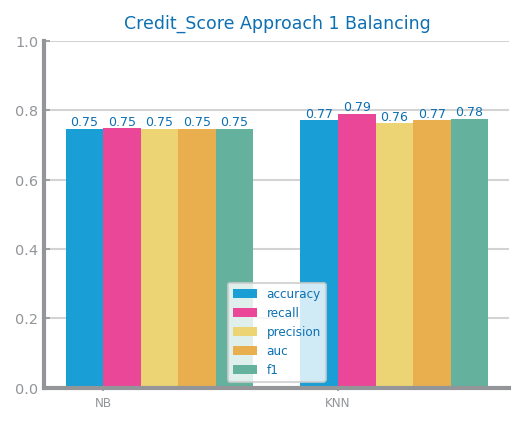

In [4]:
df_neg_sample: DataFrame = pd.DataFrame(df_negatives.sample(len(df_positives)))
df_under: pd.DataFrame = concat([df_positives, df_neg_sample], axis=0)
file_tag = "Approach 1 Balancing"
print("Minority class=", positive_class, ":", len(df_positives))
print("Majority class=", negative_class, ":", len(df_neg_sample))
print("Proportion:", round(len(df_positives) / len(df_neg_sample), 2), ": 1")

save(df_under, "alt1_under", file_tag)

In [7]:
df_pos_sample: DataFrame = DataFrame(
    df_positives.sample(len(df_negatives), replace=True)
)

df_over: DataFrame = concat([df_pos_sample, df_negatives], axis=0)
file_tag = "Approach 2 Balancing"

print("Minority class=", positive_class, ":", len(df_pos_sample))
print("Majority class=", negative_class, ":", len(df_negatives))
print("Proportion:", round(len(df_pos_sample) / len(df_negatives), 2), ": 1")
#print(df_over["Credit_Score"])
save(df_over, "alt2_over", file_tag)

Minority class= 0.0 : 56876
Majority class= 1.0 : 56876
Proportion: 1.0 : 1
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
9755     0.0
63796    0.0
51996    0.0
74015    0.0
65747    0.0
Name: Credit_Score, Length: 113752, dtype: float64


KeyboardInterrupt: 

Minority class= 0.0 : 56876
Majority class= 1.0 : 56876
Proportion: 1.0 : 1
(113752, 26)


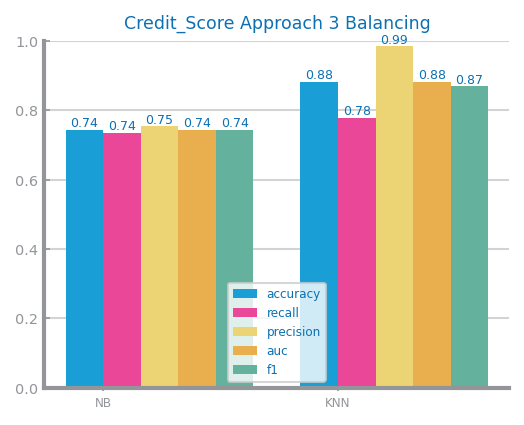

In [9]:
from numpy import ndarray
from pandas import Series
from imblearn.over_sampling import SMOTE

RANDOM_STATE = 42

smote: SMOTE = SMOTE(sampling_strategy="minority", random_state=RANDOM_STATE)
y = train.pop(target).values
X: ndarray = train.values
smote_X, smote_y = smote.fit_resample(X, y)
df_smote: DataFrame = concat([DataFrame(smote_X), DataFrame(smote_y)], axis=1)
df_smote.columns = list(train.columns) + [target]
#df_smote.to_csv(f"data/{file}_smote.csv", index=False)
file_tag = "Approach 3 Balancing"
smote_target_count: Series = Series(smote_y).value_counts()
print("Minority class=", positive_class, ":", smote_target_count[positive_class])
print("Majority class=", negative_class, ":", smote_target_count[negative_class])
print(
    "Proportion:",
    round(smote_target_count[positive_class] / smote_target_count[negative_class], 2),
    ": 1",
)
print(df_smote.shape)

save(df_smote, "alt3_SMOTE", file_tag)
